## Sentinel-1 product

Sentinel-1 product stage-in example.

### Import the Python packages

In [1]:
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
import os
import sys
import glob

import cioppy
ciop = cioppy.Cioppy()

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors

from snappy import jpy
from snappy import ProductIO
from snappy import GPF
from snappy import HashMap

import gc

from shapely.wkt import loads 

import folium

### Search parameters

Set the catalogue endpoint to Sentinel-1:

In [2]:
series = 'https://catalog.terradue.com/sentinel1/search'

Define the time of interest:

In [3]:
start_date = '2017-09-01T00:00:00'
stop_date = '2017-12-10T23:59:59'

Define the area of interest:

In [4]:
geom = 'MULTIPOLYGON (((26.832 9.5136, 28.6843 9.5136, 28.6843 7.8009, 26.832 7.8009, 26.832 9.5136)), ((32.0572 12.4549, 33.9087 12.4549, 33.9087 10.7344, 32.0572 10.7344, 32.0572 12.4549)), ((-5.5 17.26, -1.08 17.26, -1.08 13.5, -5.5 13.5, -5.5 17.26)), ((12.9415 13.7579, 14.6731 13.7579, 14.6731 12.0093, 12.9415 12.0093, 12.9415 13.7579)))'

Check the WKT validity:

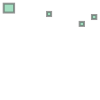

In [5]:
loads(geom)

### Build and submit the catalog search


In [6]:
search_params = dict([('geom', geom),
                     ('start', start_date),
                     ('stop', stop_date),
                      ('do', 'terradue'),
                      ('pt', 'GRD')])

In [7]:
search = ciop.search(end_point = series,
                     params = search_params,
                     output_fields='self,enclosure,identifier,wkt', 
                     model='GeoTime')

In [8]:
discovery_locations = []

for index, elem in enumerate(search):
    discovery_locations.append([t[::-1] for t in list(loads(elem['wkt']).exterior.coords)])
    
    print(index, elem['identifier'])

(0, 'S1A_IW_GRDH_1SDV_20171210T182114_20171210T182139_019644_021603_0AB1')
(1, 'S1A_IW_GRDH_1SDV_20171210T182049_20171210T182114_019644_021603_96BE')
(2, 'S1A_IW_GRDH_1SDV_20171210T182024_20171210T182049_019644_021603_0A33')
(3, 'S1A_IW_GRDH_1SDV_20171210T181959_20171210T182024_019644_021603_D3D2')
(4, 'S1A_IW_GRDH_1SDV_20171209T033328_20171209T033353_019620_02154C_F3B6')
(5, 'S1A_IW_GRDH_1SDV_20171209T033259_20171209T033328_019620_02154C_8F85')
(6, 'S1A_IW_GRDH_1SDV_20171208T183711_20171208T183736_019615_02151E_1BB2')
(7, 'S1A_IW_GRDH_1SDV_20171208T183646_20171208T183711_019615_02151E_561D')
(8, 'S1A_IW_GRDH_1SDV_20171208T183621_20171208T183646_019615_02151E_6721')
(9, 'S1B_IW_GRDH_1SDV_20171208T034043_20171208T034108_008622_00F4FA_EBD2')
(10, 'S1B_IW_GRDH_1SDV_20171208T034018_20171208T034043_008622_00F4FA_796B')
(11, 'S1A_IW_GRDH_1SDV_20171207T035045_20171207T035110_019591_021463_A5A3')
(12, 'S1A_IW_GRDH_1SDV_20171207T035016_20171207T035045_019591_021463_0026')
(13, 'S1A_IW_GRDH_1SDV

### Plot the AOIs and the search results

In [9]:
aois = []

for index, aoi in enumerate(loads(geom)):
    
    aois.append(np.asarray([t[::-1] for t in list(aoi.exterior.coords)]).tolist())
    

In [10]:
s1_index = 5

In [11]:
lat = (loads(geom).bounds[3]+loads(geom).bounds[1])/2
lon = (loads(geom).bounds[2]+loads(geom).bounds[0])/2

zoom_start = 4

m = folium.Map(location=[lat, lon], zoom_start=zoom_start)

radius = 4
folium.CircleMarker(
    location=[lat, lon],
    radius=radius,
    color='#FF0000',
    stroke=False,
    fill=True,
    fill_opacity=0.6,
    opacity=1,
    popup='{} pixels'.format(radius),
    tooltip='I am in pixels',
).add_to(m)

folium.PolyLine(
    locations=aois,
    color='#FF0000',
    weight=2,
    tooltip='Japan flooding',
).add_to(m)

folium.PolyLine(
    locations=discovery_locations,
    color='orange',
    weight=1,
    opacity=1,
    smooth_factor=0,
).add_to(m)

folium.PolyLine(
    locations=[t[::-1] for t in list(loads(search[s1_index]['wkt']).exterior.coords)],
    color='green',
    weight=1,
    opacity=1,
    smooth_factor=0,
).add_to(m)

folium.PolyLine(
    locations=aois[1],
    color='green',
    weight=1,
    opacity=1,
    smooth_factor=0,
).add_to(m)

map_path = os.path.join(os.sep, 'workspace', 'tmp', 'maps')

if not os.path.isdir(map_path):
    os.makedirs(map_path)
    
m.save(os.path.join(map_path,'map.html'))

m

In [12]:
s1_identifier = search[s1_index]['identifier']
s1_reference = search[s1_index]['self']

Prepare the variables assignment for the Jupyter Notebook streaming executable

In [13]:
print 'input_identifier = \'%s\'' % s1_identifier

input_identifier = 'S1A_IW_GRDH_1SDV_20171209T033259_20171209T033328_019620_02154C_8F85'


In [14]:
print 'input_reference = \'%s\'' % s1_reference

input_reference = 'https://catalog.terradue.com/sentinel1/search?format=atom&uid=S1A_IW_GRDH_1SDV_20171209T033259_20171209T033328_019620_02154C_8F85'


### Stage-in the data

Define the local folder where to stage-in the data to:

In [15]:
data_path = os.path.join(os.sep, 'workspace', 'tmp', 'data')

In [16]:
if not os.path.isdir(data_path):
    os.makedirs(data_path)

In [17]:
try:
    retrieved = ciop.copy(search[s1_index]['enclosure'], data_path)
except:
    retrieved = os.path.join(data_path, search[s1_index]['identifier'])

### Plot a subset


In [18]:
s1meta = "manifest.safe"
s1prd = os.path.join(data_path, s1_identifier, s1_identifier + '.SAFE', s1meta)

s1prd

'/workspace/tmp/data/S1A_IW_GRDH_1SDV_20171209T033259_20171209T033328_019620_02154C_8F85/S1A_IW_GRDH_1SDV_20171209T033259_20171209T033328_019620_02154C_8F85.SAFE/manifest.safe'

In [19]:
x = 13727
y = 10438
width = 6186
height = 6942

reader = ProductIO.getProductReader("SENTINEL-1")
product = reader.readProductNodes(s1prd, None)

HashMap = jpy.get_type('java.util.HashMap')    
GPF.getDefaultInstance().getOperatorSpiRegistry().loadOperatorSpis()

parameters = HashMap()
parameters.put('copyMetadata', True)
parameters.put('region', "%s,%s,%s,%s" % (x, y, width, height))
subset = GPF.createProduct('Subset', parameters, product)

product = None
gc.collect()

101

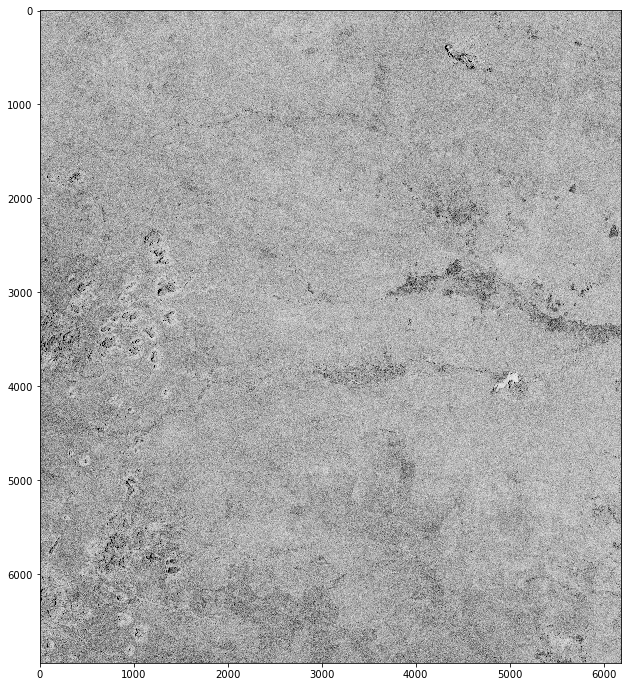

In [20]:
%matplotlib inline

def plotBand(product, band, vmin, vmax):
     
    band = product.getBand(band)

    w = band.getRasterWidth()
    h = band.getRasterHeight()

    band_data = np.zeros(w * h, np.float32)
    band.readPixels(0, 0, w, h, band_data)

    band_data.shape = h, w

    width = 12
    height = 12
    plt.figure(figsize=(width, height))
    imgplot = plt.imshow(band_data, cmap=plt.cm.binary, vmin=vmin, vmax=vmax)
    
    return imgplot 

plotBand(subset, 'Amplitude_VV', 0, 350)

In [21]:
subset = None
gc.collect()

0